---
title: 3D, STL, OBJ & Stuff
---

## Snippets

### Generate the canonical CSG example

Copy-paste the code, then check STL file with an external viewer.

In [4]:
from sdf import *

f = sphere(1) & box(1.5)

c = cylinder(0.5)
f -= c.orient(X) | c.orient(Y) | c.orient(Z)

f.save("out.stl")

min -0.84543, -0.84543, -0.84543
max 0.845431, 0.845431, 0.845431
step 0.0104847, 0.0104847, 0.0104847
4657463 samples in 216 batches with 12 workers
  100% (216 of 216) [##############################] 0:00:01 0:00:00    
44 skipped, 60 empty, 112 nonempty
291028 triangles in 0.829229 seconds


### Binary STL

- [ ] Discover that `out.stl` is not ASCII text, but binary
- [ ] Read about binary STL online
- [ ] Ask if there is anything useful in the first 80 bytes (header)
- [ ] Read the number of triangles (hint to `numpy.fromfile`); check that works out.
- [ ] Check that the lenth of the binary data checks out with this count and the spec

In [30]:
with open("out.stl", mode="rb") as file:
    print(file.read(200))

b'\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\xd4p\x04\x00\x81g0\xbf\xa2.\x03\xbf\xa2.\x03\xbfB+0\xbf+\x8a\x02\xbf\x88!\x04\xbfB+0\xbf\x88!\x04\xbf+\x8a\x02\xbf1Z1\xbf+\x8a\x02\xbf+\x8a\x02\xbf\x00\x00\xbb\x0b.\xbf\x1f\x13\x06\xbflh\x03\xbf#|-\xbfJ9\x05\xbf\xf9\x00\x05\xbf#|-\xbf\x8c\xa3\x07\xbf+\x8a\x02\xbfhX/\xbfJ9\x05\xbf+\x8a\x02\xbf\x00\x00\xbb\x0b.\xbflh\x03\xbf\x1f\x13\x06\xbf#|-\xbf'


In [32]:
with open("out.stl", mode="rb") as file:
    header = file.read(80)
header == 80 * bytes([0])

True

In [35]:
import numpy as np
with open("out.stl", mode="rb") as file:
    count = np.fromfile(file, dtype=np.uint32, count=1, offset=80)
count[0]

array([291028], dtype=uint32)

In [40]:
# Alternative: read header, then offset not necessary
# TODO: warn about "cursor" and offset with numpy.fromfile for something partially read
# Suggest a little experiment maybe to discover what's going on.
import numpy as np
with open("out.stl", mode="rb") as file:
    header = file.read(80)
    count = np.fromfile(file, dtype=np.uint32, count=1)[0]
print(count)

291028


In [44]:
import numpy as np
with open("out.stl", mode="rb") as file:
    data = file.read()
    print(len(data))
    print(80 + 4 + count * (4*4*3 + 2))

14551484
14551484


### Matplotlib 3D first try

Mmmm there is some `meshio` stuff here. Too complex actually, lead the students to make their own micro-matplotlib3d.

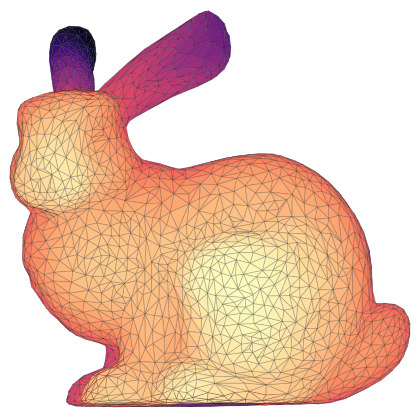

In [23]:
import numpy as np
from mpl3d import glm
from mpl3d.mesh import Mesh
from mpl3d.camera import Camera
import meshio
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(4,4))
ax = fig.add_axes([0,0,1,1], xlim=[-1,+1], ylim=[-1,+1], aspect=1)
ax.axis("off")

camera = Camera("ortho", scale=2)
mesh = meshio.read("data/bunny.obj")
vertices = mesh.points
faces = mesh.cells[0].data
vertices = glm.fit_unit_cube(vertices)
mesh = Mesh(ax, camera.transform, vertices, faces,
            cmap=plt.get_cmap("magma"),  edgecolors=(0,0,0,0.25))
plt.savefig("bunny.png", dpi=600)
plt.show()


## Ideas

dsjkdsj

- [x] item A
- [ ] item B

## Info / References

### Online 3D Viewer

  - [Online 3D Viewer](https://3dviewer.net/)

### Meshview

Install with `go install github.com/fogleman/meshview/cmd/meshview@latest`